In [4]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [8]:
! chmod 600 /root/.kaggle/kaggle.json

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
! kaggle datasets download moltean/fruits

 98% 1.26G/1.28G [00:11<00:00, 162MB/s]
100% 1.28G/1.28G [00:11<00:00, 124MB/s]


In [10]:
! unzip fruits

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [11]:
!ls fruits-360_dataset/fruits-360

LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [12]:
import os
os.listdir('fruits-360_dataset/fruits-360/Training')

['Pear Williams',
 'Grape Pink',
 'Tomato not Ripened',
 'Passion Fruit',
 'Physalis with Husk',
 'Salak',
 'Tamarillo',
 'Nut Pecan',
 'Mango',
 'Cherry 2',
 'Cherry Wax Black',
 'Peach 2',
 'Kumquats',
 'Walnut',
 'Watermelon',
 'Nectarine Flat',
 'Pitahaya Red',
 'Lemon',
 'Pear 2',
 'Apple Pink Lady',
 'Grapefruit Pink',
 'Raspberry',
 'Corn Husk',
 'Banana',
 'Clementine',
 'Dates',
 'Maracuja',
 'Pear',
 'Fig',
 'Nectarine',
 'Avocado',
 'Cantaloupe 2',
 'Mangostan',
 'Ginger Root',
 'Nut Forest',
 'Avocado ripe',
 'Pomegranate',
 'Chestnut',
 'Apple Red Delicious',
 'Plum 2',
 'Mandarine',
 'Huckleberry',
 'Tomato 2',
 'Grape Blue',
 'Strawberry',
 'Banana Lady Finger',
 'Cucumber Ripe 2',
 'Pear Abate',
 'Grapefruit White',
 'Pineapple',
 'Cherry 1',
 'Carambula',
 'Mango Red',
 'Potato White',
 'Plum',
 'Physalis',
 'Pear Red',
 'Pear Kaiser',
 'Pepper Yellow',
 'Eggplant',
 'Limes',
 'Cherry Rainier',
 'Papaya',
 'Cucumber Ripe',
 'Apricot',
 'Kaki',
 'Cocos',
 'Tomato Heart'

In [13]:
#Setting Training & Test dir paths
train_path = './fruits-360_dataset/fruits-360/Training/'
test_path = './fruits-360_dataset/fruits-360/Test/'

In [14]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from google.colab import drive

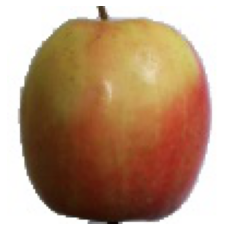

(100, 100, 3)


In [15]:
#Displaying the image
img = load_img(train_path + "Apple Pink Lady/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

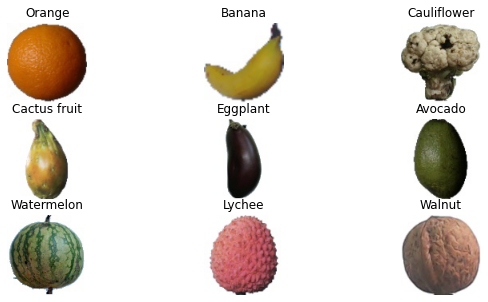

In [16]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [17]:
#Storing occurences of fruits in a list
classes = []
fruit_item = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        classes.append(i) 
        fruit_item.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
count = Counter(classes)
most_frequent = count.most_common(10)
print("Top 10 frequent Fruits:")
most_frequent

Top 10 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Peach 2', 738),
 ('Cherry Rainier', 738),
 ('Tomato 3', 738),
 ('Tomato 1', 738),
 ('Melon Piel de Sapo', 738),
 ('Strawberry Wedge', 738),
 ('Walnut', 735)]

In [18]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [22]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(x.shape),
                   pooling='avg',classes=131,
                   weights='imagenet')

for layer in pretrained_model.layers[:143]:
        layer.trainable=False


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(131, activation='softmax'))

In [31]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 131)               67203     
                                                                 
Total params: 24,704,003
Trainable params: 1,116,291
Non-trainable params: 23,587,712
_________________________________________________________________


In [36]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

data augmentation

In [38]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [41]:
#Fitting the model
hist = resnet_model.fit(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

<ipython-input-41-f64da9147277>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = resnet_model.fit_generator(


Epoch 1/100
25/25 [==============================] - 17s 270ms/step - loss: 4.9923 - accuracy: 0.0113 - val_loss: 4.8823 - val_accuracy: 0.0052
Epoch 2/100
25/25 [==============================] - 7s 282ms/step - loss: 4.8736 - accuracy: 0.0169 - val_loss: 4.8528 - val_accuracy: 0.0391
Epoch 3/100
25/25 [==============================] - 6s 241ms/step - loss: 4.8522 - accuracy: 0.0200 - val_loss: 4.8418 - val_accuracy: 0.0208
Epoch 4/100
25/25 [==============================] - 6s 248ms/step - loss: 4.8435 - accuracy: 0.0169 - val_loss: 4.8176 - val_accuracy: 0.0169
Epoch 5/100
25/25 [==============================] - 6s 241ms/step - loss: 4.8366 - accuracy: 0.0162 - val_loss: 4.8079 - val_accuracy: 0.0195
Epoch 6/100
25/25 [==============================] - 6s 240ms/step - loss: 4.8110 - accuracy: 0.0131 - val_loss: 4.7816 - val_accuracy: 0.0326
Epoch 7/100
25/25 [==============================] - 6s 232ms/step - loss: 4.7940 - accuracy: 0.0213 - val_loss: 4.7771 - val_accuracy: 0.026

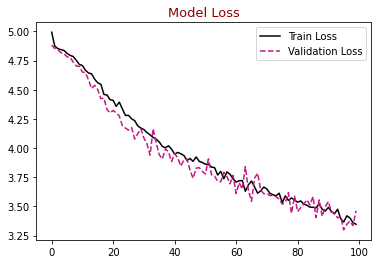

In [42]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

In [43]:
import os.path
resnet_model.save('/resnet50_tl_fruits.h5')

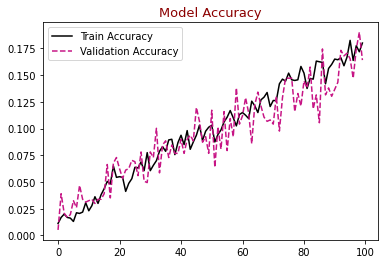

In [44]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

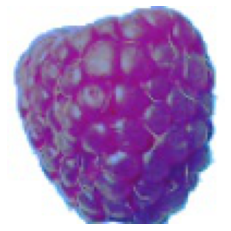

In [60]:
#Displaying the selected image
img = load_img(test_path + "/Raspberry/77_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('./fruits-360_dataset/fruits-360/Test/Raspberry/77_100.jpg')

In [61]:
prediction = (np.argmax(resnet_model.predict(image), axis=-1))
print(prediction)

1/1 [==============================] - 0s 21ms/step
[69]


In [59]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui